In [81]:
import glob
import pandas as pd
from dateutil import parser
import datetime
import ACILib

SYDEngrList = ACILib.ACI_SYDEngrList
BGLEngrList = ACILib.ACI_BGLEngrList
BGLOtherEngrList = ACILib.ACI_BGLOtherEngrList
SYDOtherEngrList = ACILib.ACI_SYDOtherEngrList
AllEngrList = [*SYDEngrList,*BGLEngrList,*BGLOtherEngrList,*SYDOtherEngrList]
    
def ReadAcceptfile(filename='/home/jovyan/HTTSDashboard/logs/ACI/events/*_AcceptEvent.txt'):
    
    AcceptGlobList = glob.glob(filename)
    
    SYDEngrList = ACILib.ACI_SYDEngrList
    BGLEngrList = ACILib.ACI_BGLEngrList
    BGLOtherEngrList = ACILib.ACI_BGLOtherEngrList
    SYDOtherEngrList = ACILib.ACI_SYDOtherEngrList
    
    AcceptEvents = []
    for file in AcceptGlobList:
        
        print('Processing accept events from {}'.format(file))
        with open(file,'r') as f:
            AcceptEvents_from_file = f.readlines()
        f.close()
        
        ###### Update EngrList######
        for idx,line in enumerate(AcceptEvents_from_file):
            caseno,severity,ccoid,workgroup,timestamp = line.strip().split('-~')
            if workgroup == 'APT-ACI-SOLUTIONS' and ccoid not in SYDEngrList:
                print("{} Appending APT-ACI-SOLUTIONS {}".format(line,ccoid))
                SYDEngrList.append(ccoid)
            elif workgroup == 'APT-ACI-SOLUTIONS2' and ccoid not in BGLEngrList:
                print("{} Appending APT-ACI-SOLUTIONS2 {}".format(line,ccoid))
                BGLEngrList.append(ccoid)
            elif workgroup == 'GCE-ACI-Solutions' and ccoid not in BGLOtherEngrList:
                print("{} Appending GCE-ACI-Solutions {}".format(lineccoid))
                BGLOtherEngrList.append(ccoid)
        
        ###### Add index ######
        AcceptEvents1 = [[idx,*line.strip().split('-~')] for idx,line in enumerate(AcceptEvents_from_file)]
        #print(AcceptEvents[10])
        #[10, '688521682', '3', 'damistry', 'Unknown', '2020-02-27 01:41:23']
        
        ###### Split Date-Time to Date and Time columns ######   
        AcceptEvents2 = [[*event,parser.parse(event[5]).strftime("%Y-%m-%d")] for event in AcceptEvents1]
        AcceptEvents3 = [[*event,parser.parse(event[5]).strftime("%H:%M:%S")] for event in AcceptEvents2]
        #print(AcceptEvents[10])
        #[10, '688521682', '3', 'damistry', 'Unknown', '2020-02-27 01:41:23', '2020-02-27', '01:41:23']
        
        ###### Add Weekdays start from 0(Monday) ######
        AcceptEvents4 = [[*event,parser.parse(event[5]).weekday()] for event in AcceptEvents3]
        #print(AcceptEvents[10])
        #[10, '688521682', '3', 'damistry', 'Unknown', '2020-02-27 01:41:23', '2020-02-27', '01:41:23', 3]
        AcceptEvents = [*AcceptEvents,*AcceptEvents4]
        
    pd_labels = ['Idx','No','Sev','ccoid','Workgroup','DateTime','Date','Time','Weekday']
    df = pd.DataFrame.from_records(AcceptEvents,columns=pd_labels)
        
    ###### Only Onlist Engineer ######
    AllEngrList = set([*SYDEngrList,*BGLEngrList,*BGLOtherEngrList,*SYDOtherEngrList])
    df = df[df['ccoid'].isin(AllEngrList)]
        
    return df

df = ReadAcceptfile()
df = df[df['Date'].between('2020-05-20','2020-05-26',inclusive=True)]
df[-10:]

Processing accept events from /home/jovyan/HTTSDashboard/logs/ACI/events/2020_AcceptEvent.txt


,Idx,No,Sev,ccoid,Workgroup,DateTime,Date,Time,Weekday
2385,2385,689155481,3,roagraw2,APT-ACI-SOLUTIONS2,2020-05-26 00:16:59,2020-05-26,00:16:59,1
2387,2387,688534492,3,prpratee,UC_WORKGROUP,2020-05-26 00:22:19,2020-05-26,00:22:19,1
2390,2390,689155590,3,reperuma,APT-ACI-SOLUTIONS2,2020-05-26 01:06:27,2020-05-26,01:06:27,1
2391,2391,689117973,2,kahande,APT-ACI-SOLUTIONS2,2020-05-26 01:31:46,2020-05-26,01:31:46,1
2393,2393,689155730,3,minkwong,APT-ACI-SOLUTIONS,2020-05-26 02:43:56,2020-05-26,02:43:56,1
2398,2398,689156053,3,gauvasud,APT-ACI-SOLUTIONS2,2020-05-26 03:47:40,2020-05-26,03:47:40,1
2399,2399,689144014,3,tonzeng,APT-ACI-SOLUTIONS,2020-05-26 03:53:20,2020-05-26,03:53:20,1
2403,2403,689155412,1,raghb,APT-ACI-SOLUTIONS2,2020-05-26 05:10:03,2020-05-26,05:10:03,1
2405,2405,689156371,3,wilchong,APT-ACI-SOLUTIONS,2020-05-26 05:32:32,2020-05-26,05:32:32,1
2407,2407,689156053,2,jawalia,APT-ACI-SOLUTIONS2,2020-05-26 05:41:39,2020-05-26,05:41:39,1


In [82]:
df_BLR_all = df[df['ccoid'].isin([*BGLEngrList,*BGLOtherEngrList])]
df_SYD_all = df[df['ccoid'].isin([*SYDEngrList,*SYDOtherEngrList])]
df_BLR_all[-10:]

,Idx,No,Sev,ccoid,Workgroup,DateTime,Date,Time,Weekday
2376,2376,689112169,3,knagavol,GCE-ACI-Solutions,2020-05-25 04:33:00,2020-05-25,04:33:00,0
2377,2377,688883579,3,vkalmath,APT-ACI-SOLUTIONS2,2020-05-25 04:40:16,2020-05-25,04:40:16,0
2378,2378,689142571,3,prpratee,APT-ACI-SOLUTIONS2,2020-05-25 05:24:31,2020-05-25,05:24:31,0
2385,2385,689155481,3,roagraw2,APT-ACI-SOLUTIONS2,2020-05-26 00:16:59,2020-05-26,00:16:59,1
2387,2387,688534492,3,prpratee,UC_WORKGROUP,2020-05-26 00:22:19,2020-05-26,00:22:19,1
2390,2390,689155590,3,reperuma,APT-ACI-SOLUTIONS2,2020-05-26 01:06:27,2020-05-26,01:06:27,1
2391,2391,689117973,2,kahande,APT-ACI-SOLUTIONS2,2020-05-26 01:31:46,2020-05-26,01:31:46,1
2398,2398,689156053,3,gauvasud,APT-ACI-SOLUTIONS2,2020-05-26 03:47:40,2020-05-26,03:47:40,1
2403,2403,689155412,1,raghb,APT-ACI-SOLUTIONS2,2020-05-26 05:10:03,2020-05-26,05:10:03,1
2407,2407,689156053,2,jawalia,APT-ACI-SOLUTIONS2,2020-05-26 05:41:39,2020-05-26,05:41:39,1


In [83]:
df_BLR_CasePerDay = df_BLR_all.groupby(['Date']).agg('count')['No'].reset_index()
df_BLR_CasePerDay.rename(columns={'Date':'Date','No':'BLRCaseNo'},inplace=True)
df_BLR_CasePerDay[:10]

,Date,BLRCaseNo
0,2020-05-20,15
1,2020-05-21,13
2,2020-05-22,13
3,2020-05-23,9
4,2020-05-24,9
5,2020-05-25,7
6,2020-05-26,7


In [84]:
#BLR Engineer per date list
df_BLR_engr_by_date = df_BLR_all.groupby('Date')['ccoid'].unique().to_frame()
df_BLR_engr_by_date.rename(columns={'Date':'Date','ccoid':'BLRccoidList'},inplace=True)
df_BLR_engr_by_date = df_BLR_engr_by_date.reset_index()
df_BLR_engr_by_date['Date'] = pd.to_datetime(df_BLR_engr_by_date['Date']).dt.date
df_BLR_engr_by_date['Weekday'] = pd.to_datetime(df_BLR_engr_by_date['Date']).dt.dayofweek
df_BLR_engr_by_date[-10:]

,Date,BLRccoidList,Weekday
0,2020-05-20,"[gauvasud, jawalia, maveer, hethakur, kahande,...",2
1,2020-05-21,"[gauvasud, maveer, reperuma, kahande, raghb, p...",3
2,2020-05-22,"[kahande, prpratee, reperuma, gauvasud, deepak...",4
3,2020-05-23,"[roagraw2, kahande, maveer, hethakur, deepaky,...",5
4,2020-05-24,"[reperuma, vkalmath, prpratee, jawalia, gauvasud]",6
5,2020-05-25,"[vkalmath, prpratee, gauvasud, jawalia, knagavol]",0
6,2020-05-26,"[roagraw2, prpratee, reperuma, kahande, gauvas...",1


In [85]:
###### Engineer Per Day BLR ######
df_BLR_engr_by_date['BLREngrNo'] = df_BLR_engr_by_date['BLRccoidList'].str.len().to_frame()
#df_blr_engr_per_day.rename(columns={'Date':'Date','ccoid':'BLREngrNo'},inplace=True)
#df_blr_engr_per_day['Date'] = pd.to_datetime(df_blr_engr_per_day['Date']).dt.date
df_BLR_engr_by_date[-10:]

,Date,BLRccoidList,Weekday,BLREngrNo
0,2020-05-20,"[gauvasud, jawalia, maveer, hethakur, kahande,...",2,7
1,2020-05-21,"[gauvasud, maveer, reperuma, kahande, raghb, p...",3,9
2,2020-05-22,"[kahande, prpratee, reperuma, gauvasud, deepak...",4,8
3,2020-05-23,"[roagraw2, kahande, maveer, hethakur, deepaky,...",5,6
4,2020-05-24,"[reperuma, vkalmath, prpratee, jawalia, gauvasud]",6,5
5,2020-05-25,"[vkalmath, prpratee, gauvasud, jawalia, knagavol]",0,5
6,2020-05-26,"[roagraw2, prpratee, reperuma, kahande, gauvas...",1,7


In [86]:
###### Syd Stats need to remove SYD_Other from weekdays ######
df_SYD_CasePerDay = df_SYD_all.groupby(['Date']).agg('count')['No'].reset_index()
df_SYD_CasePerDay.rename(columns={'Date':'Date','No':'SYDCaseNo'},inplace=True)
df_SYD_CasePerDay[-10:]

,Date,SYDCaseNo
0,2020-05-20,9
1,2020-05-21,8
2,2020-05-22,10
3,2020-05-23,4
4,2020-05-24,8
5,2020-05-25,6
6,2020-05-26,3


In [87]:
#SYD Engineer per date list
df_SYD_engr_by_date = df_SYD_all.groupby('Date')['ccoid'].unique().to_frame()
df_SYD_engr_by_date.rename(columns={'Date':'Date','ccoid':'SYDccoidList'},inplace=True)
df_SYD_engr_by_date = df_SYD_engr_by_date.reset_index()
df_SYD_engr_by_date['Date'] = pd.to_datetime(df_SYD_engr_by_date['Date']).dt.date
df_SYD_engr_by_date['Weekday'] = pd.to_datetime(df_SYD_engr_by_date['Date']).dt.dayofweek
df_SYD_engr_by_date[-10:]

,Date,SYDccoidList,Weekday
0,2020-05-20,"[junwa, debabbar, zdazhi, wilchong]",2
1,2020-05-21,"[siddhp, tonzeng, wilchong, junwa, zmeng, deba...",3
2,2020-05-22,"[wilchong, tonzeng, zmeng, junwa, debabbar, si...",4
3,2020-05-23,"[minkwong, siddhp]",5
4,2020-05-24,"[junwa, tonzeng, zmeng]",6
5,2020-05-25,"[junwa, debabbar, minkwong, wilchong, tonzeng]",0
6,2020-05-26,"[minkwong, tonzeng, wilchong]",1


In [88]:
###### caluclute weekday without SYD_Other ######
df_SYD_engr_by_weekday = df_SYD_engr_by_date[(df_SYD_engr_by_date['Weekday'] != 5) & (df_SYD_engr_by_date['Weekday'] != 6)]
df_SYD_engr_by_weekend = df_SYD_engr_by_date[(df_SYD_engr_by_date['Weekday'] == 5) | (df_SYD_engr_by_date['Weekday'] == 6)]
#df_SYD_engr_by_weekday[-10:]
df_SYD_engr_by_weekend[-10:]

,Date,SYDccoidList,Weekday
3,2020-05-23,"[minkwong, siddhp]",5
4,2020-05-24,"[junwa, tonzeng, zmeng]",6


In [89]:
###### Remove SYD_Other List from Weekday ######
def remove_syd_other(ccoid_list):
    SYDOtherEngrList = ['zdazhi','zmeng']
    new_list = [ccoid for ccoid in ccoid_list if ccoid not in SYDOtherEngrList]
    return new_list
df_SYD_engr_by_weekday['SYDccoidListClean'] = df_SYD_engr_by_weekday['SYDccoidList'].apply(remove_syd_other)
df_SYD_engr_by_weekday[-10:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,SYDccoidList,Weekday,SYDccoidListClean
0,2020-05-20,"[junwa, debabbar, zdazhi, wilchong]",2,"[junwa, debabbar, wilchong]"
1,2020-05-21,"[siddhp, tonzeng, wilchong, junwa, zmeng, deba...",3,"[siddhp, tonzeng, wilchong, junwa, debabbar, l..."
2,2020-05-22,"[wilchong, tonzeng, zmeng, junwa, debabbar, si...",4,"[wilchong, tonzeng, junwa, debabbar, siddhp]"
5,2020-05-25,"[junwa, debabbar, minkwong, wilchong, tonzeng]",0,"[junwa, debabbar, minkwong, wilchong, tonzeng]"
6,2020-05-26,"[minkwong, tonzeng, wilchong]",1,"[minkwong, tonzeng, wilchong]"


In [90]:
###### Engineer Per Day SYD Weekday ######
df_SYD_engr_by_weekday['ccoid'] = df_SYD_engr_by_weekday['SYDccoidListClean'].str.len().to_frame()
df_SYD_engr_by_weekday.rename(columns={'Date':'Date','ccoid':'SYDEngrNo'},inplace=True)
df_SYD_engr_by_weekday[-10:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,SYDccoidList,Weekday,SYDccoidListClean,SYDEngrNo
0,2020-05-20,"[junwa, debabbar, zdazhi, wilchong]",2,"[junwa, debabbar, wilchong]",3
1,2020-05-21,"[siddhp, tonzeng, wilchong, junwa, zmeng, deba...",3,"[siddhp, tonzeng, wilchong, junwa, debabbar, l...",6
2,2020-05-22,"[wilchong, tonzeng, zmeng, junwa, debabbar, si...",4,"[wilchong, tonzeng, junwa, debabbar, siddhp]",5
5,2020-05-25,"[junwa, debabbar, minkwong, wilchong, tonzeng]",0,"[junwa, debabbar, minkwong, wilchong, tonzeng]",5
6,2020-05-26,"[minkwong, tonzeng, wilchong]",1,"[minkwong, tonzeng, wilchong]",3


In [91]:
######Engineer Per Day SYD Weekend ######
df_SYD_engr_by_weekend['SYDEngrNo'] = df_SYD_engr_by_weekend['SYDccoidList'].str.len().to_frame()
#df_SYD_engr_by_weekend = df_SYD_engr_by_weekend.drop(['SYDEngrNo'],axis=1)
#df_SYD_engr_by_weekend.rename(columns={'Date':'Date','ccoid':'SYDEngrNo'},inplace=True)
df_SYD_engr_by_weekend[-10:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,SYDccoidList,Weekday,SYDEngrNo
3,2020-05-23,"[minkwong, siddhp]",5,2
4,2020-05-24,"[junwa, tonzeng, zmeng]",6,3


In [92]:
df_SYD_engr_by_weekend[['Date','SYDEngrNo','Weekday']]

,Date,SYDEngrNo,Weekday
3,2020-05-23,2,5
4,2020-05-24,3,6


In [93]:
###### Contact Syd Engr No ######
df_SYD_engr_by_date_2 = pd.concat([df_SYD_engr_by_weekday[['Date','SYDEngrNo','Weekday']],df_SYD_engr_by_weekend[['Date','SYDEngrNo','Weekday']]])
df_SYD_engr_by_date_2 = df_SYD_engr_by_date_2.sort_values(by="Date")
df_SYD_engr_by_date_2[-10:]

,Date,SYDEngrNo,Weekday
0,2020-05-20,3,2
1,2020-05-21,6,3
2,2020-05-22,5,4
3,2020-05-23,2,5
4,2020-05-24,3,6
5,2020-05-25,5,0
6,2020-05-26,3,1


In [94]:
###### Onshift Engineer Plotting ######
df_BLR_engr_by_date[-10:]

,Date,BLRccoidList,Weekday,BLREngrNo
0,2020-05-20,"[gauvasud, jawalia, maveer, hethakur, kahande,...",2,7
1,2020-05-21,"[gauvasud, maveer, reperuma, kahande, raghb, p...",3,9
2,2020-05-22,"[kahande, prpratee, reperuma, gauvasud, deepak...",4,8
3,2020-05-23,"[roagraw2, kahande, maveer, hethakur, deepaky,...",5,6
4,2020-05-24,"[reperuma, vkalmath, prpratee, jawalia, gauvasud]",6,5
5,2020-05-25,"[vkalmath, prpratee, gauvasud, jawalia, knagavol]",0,5
6,2020-05-26,"[roagraw2, prpratee, reperuma, kahande, gauvas...",1,7


In [95]:
###### Onshift Engineer Plotting ######
df_SYD_engr_by_date_2[-10:]

,Date,SYDEngrNo,Weekday
0,2020-05-20,3,2
1,2020-05-21,6,3
2,2020-05-22,5,4
3,2020-05-23,2,5
4,2020-05-24,3,6
5,2020-05-25,5,0
6,2020-05-26,3,1


In [96]:
###### Onshift Engineer Plotting ######
df_engr_by_date = pd.concat([df_BLR_engr_by_date[['BLREngrNo']],df_SYD_engr_by_date_2], 
                            axis=1,ignore_index=True, sort=True)
df_engr_by_date.rename(columns={0:'BLREngrNo',1:'Date',2:'SYDEngrNo',3:'Weekday'},inplace=True)
df_engr_by_date

,BLREngrNo,Date,SYDEngrNo,Weekday
0,7,2020-05-20,3,2
1,9,2020-05-21,6,3
2,8,2020-05-22,5,4
3,6,2020-05-23,2,5
4,5,2020-05-24,3,6
5,5,2020-05-25,5,0
6,7,2020-05-26,3,1


In [97]:
###### Additional: Inqueue Case for the period ######
###### Additional: Copy from Analytics_Inqueue ######
def ReadInQueuefile(filename='/home/jovyan/HTTSDashboard/logs/ACI/events/*_InQueueEvent.txt'):
    
    CaseInQueueFileList = glob.glob(filename)
    #print(CaseInQueueFileList)
    for file in CaseInQueueFileList:
        
        print('Processing InQueue events from {}'.format(file))
        with open(file,'r') as f:
            InQueueEvents = f.readlines()
        f.close()
        #print(InQueueEvents[0])
        ###### Add index ######
        InQueueEvents = [[idx,*line.strip().split('-~')] for idx,line in enumerate(InQueueEvents)]
        #print(InQueueEvents[10])
        
        ###### Split Date-Time to Date and Time columns ######
        InQueueEvents = [[*event,parser.parse(event[4]).strftime("%Y-%m-%d")] for event in InQueueEvents]
        InQueueEvents = [[*event,parser.parse(event[4]).strftime("%H:%M:%S")] for event in InQueueEvents]
        #print(InQueueEvents[10])
        
        ###### Add Weekdays start from 0(Monday) ######
        InQueueEvents = [[*event,parser.parse(event[4]).weekday()] for event in InQueueEvents]
        #print(InQueueEvents[10])
        
        pd_labels = ['Idx','No','Sev','Queue','DateTime','Date','Time','Weekday']
        df = pd.DataFrame.from_records(InQueueEvents,columns=pd_labels)
        #print(df)
        return df
    
df = ReadInQueuefile()
df = df[df['Date'].between('2020-05-20','2020-05-26',inclusive=True)]
df_cnt_by_weekday = df.groupby(['Weekday']).agg('count').reset_index()
df_weekday_cnt = df.groupby(['Date']).agg('mean').groupby(['Weekday']).agg('count')
df_weekday_cnt = df_weekday_cnt.reset_index()
df_weekday_cnt['Weekday'] = df_weekday_cnt['Weekday'].astype('int')
df_avgcnt_weekdy = df_cnt_by_weekday
df_avgcnt_weekdy['WeekdayCount'] = df_weekday_cnt['Idx']
df_avgcnt_weekdy['AvgCaseVol'] = df_avgcnt_weekdy['No']/df_avgcnt_weekdy['WeekdayCount']
df_avgcnt_weekdy['AvgCaseVol'].astype('float64')
df_avgcnt_weekdy['AvgCaseVol'] = df_avgcnt_weekdy['AvgCaseVol'].round(1)
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_avgcnt_weekdy['WeekdayName'] = df_avgcnt_weekdy['Weekday'].apply(lambda x: days[x])
df_avgcnt_weekdy

Processing InQueue events from /home/jovyan/HTTSDashboard/logs/ACI/events/2020_InQueueEvent.txt


,Weekday,Idx,No,Sev,Queue,DateTime,Date,Time,WeekdayCount,AvgCaseVol,WeekdayName
0,0,12,12,12,12,12,12,12,1,12.0,Monday
1,1,11,11,11,11,11,11,11,1,11.0,Tuesday
2,2,26,26,26,26,26,26,26,1,26.0,Wednesday
3,3,18,18,18,18,18,18,18,1,18.0,Thursday
4,4,25,25,25,25,25,25,25,1,25.0,Friday
5,5,13,13,13,13,13,13,13,1,13.0,Saturday
6,6,16,16,16,16,16,16,16,1,16.0,Sunday


In [103]:
#####3 Additional: Avg Engineer per weekday ######
df_engr_by_date['TotEngrNo'] = df_engr_by_date['BLREngrNo'] + df_engr_by_date['SYDEngrNo']
df_engr_by_date = df_engr_by_date.groupby('Weekday').agg('sum').reset_index()
df_engr_by_date = df_engr_by_date.sort_values(by='Weekday').reset_index(drop=True)
df_engr_by_date

,Weekday,BLREngrNo,SYDEngrNo,TotEngrNo
0,0,5,5,10
1,1,7,3,10
2,2,7,3,10
3,3,9,6,15
4,4,8,5,13
5,5,6,2,8
6,6,5,3,8


In [102]:
####### Additional: Add engr to the above DF ######
df_avgcnt_weekdy['AvgEngrNo'] = df_engr_by_date['TotEngrNo']/df_avgcnt_weekdy['WeekdayCount']
df_avgcnt_weekdy['AvgEngrNo'].astype('float64')
df_avgcnt_weekdy['AvgEngrNo'] = df_avgcnt_weekdy['AvgEngrNo'].round(1)
df_avgcnt_weekdy

,Weekday,Idx,No,Sev,Queue,DateTime,Date,Time,WeekdayCount,AvgCaseVol,WeekdayName,AvgEngrNo
0,0,12,12,12,12,12,12,12,1,12.0,Monday,10.0
1,1,11,11,11,11,11,11,11,1,11.0,Tuesday,10.0
2,2,26,26,26,26,26,26,26,1,26.0,Wednesday,10.0
3,3,18,18,18,18,18,18,18,1,18.0,Thursday,15.0
4,4,25,25,25,25,25,25,25,1,25.0,Friday,13.0
5,5,13,13,13,13,13,13,13,1,13.0,Saturday,8.0
6,6,16,16,16,16,16,16,16,1,16.0,Sunday,8.0


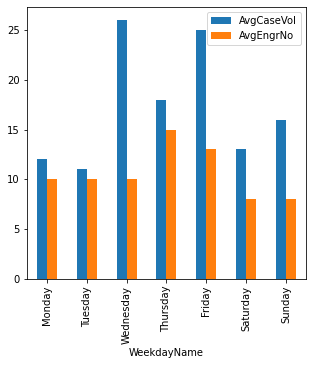

In [100]:
####### Additional: Plot both Case per day/engr per day ######
ax = df_avgcnt_weekdy.plot(kind='bar',x='WeekdayName',y=['AvgCaseVol','AvgEngrNo'],figsize=(5,5))

In [101]:
###### Onshift Engineer Plotting ######
df_engr_by_date.plot.area(x='Date',y=['BLREngrNo','SYDEngrNo'],figsize=[15,5],stacked=False)

KeyError: 'Date'

In [104]:
######Contact Together
df_BLR_case_engr = pd.concat([df_BLR_CasePerDay, df_BLR_engr_by_date], axis=1,ignore_index=True, sort=True)
df_BLR_case_engr = df_BLR_case_engr.drop([2,3],axis=1)
df_BLR_case_engr.rename(columns={0:'Date',1:'BLRCaseNo',4:'Weekday',5:'BLREngrNo'},inplace=True)
df_BLR_case_engr['BLRCaseNo'].astype('float64')
df_BLR_case_engr['BLREngrNo'].astype('float64')
df_BLR_case_engr['BLRCasePerEngr'] = (df_BLR_case_engr['BLRCaseNo']/df_BLR_case_engr['BLREngrNo']).round(2)

df_SYD_case_engr = pd.concat([df_SYD_CasePerDay, df_SYD_engr_by_date_2], axis=1,ignore_index=True, sort=True)
df_SYD_case_engr = df_SYD_case_engr.drop([2],axis=1)
df_SYD_case_engr.rename(columns={0:'Date',1:'SYDCaseNo',3:'SYDEngrNo',4:'Weekday'},inplace=True)
df_SYD_case_engr['SYDCaseNo'].astype('float64')
df_SYD_case_engr['SYDEngrNo'].astype('float64')
df_SYD_case_engr['SYDCasePerEngr'] = (df_SYD_case_engr['SYDCaseNo']/df_SYD_case_engr['SYDEngrNo']).round(2)
df_BLR_case_engr[-10:]
#df_SYD_case_engr[-10:]

,Date,BLRCaseNo,Weekday,BLREngrNo,BLRCasePerEngr
0,2020-05-20,15,2,7,2.14
1,2020-05-21,13,3,9,1.44
2,2020-05-22,13,4,8,1.62
3,2020-05-23,9,5,6,1.50
4,2020-05-24,9,6,5,1.80
5,2020-05-25,7,0,5,1.40
6,2020-05-26,7,1,7,1.00


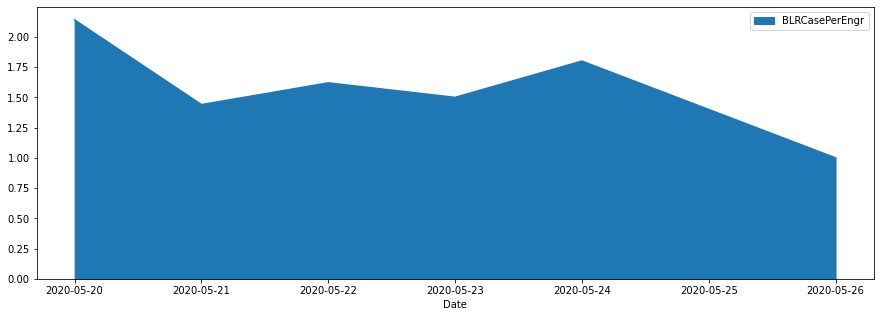

In [105]:
#Plot BLR the result
df_BLR_case_engr.plot(kind='area',x='Date',y='BLRCasePerEngr',figsize=[15,5])

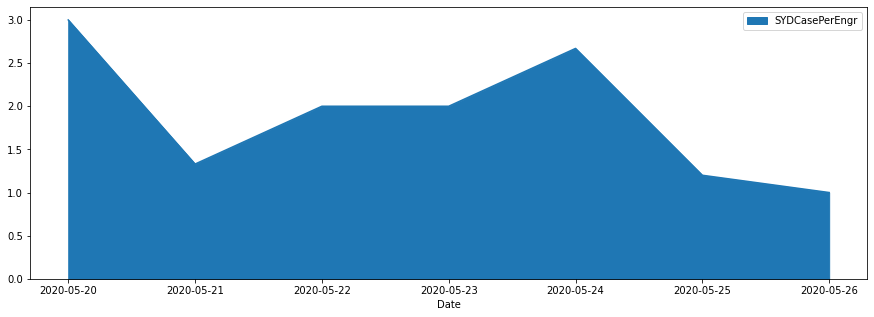

In [106]:
#Plot SYD the result
df_SYD_case_engr.plot(kind='area',x='Date',y='SYDCasePerEngr',figsize=[15,5])

In [109]:
#Combined plot dataframe
df_caseperengr_compare = pd.concat([df_SYD_case_engr, df_BLR_case_engr], axis=1,ignore_index=True, sort=True)
df_caseperengr_compare = df_caseperengr_compare.drop([5,3],axis=1)
df_caseperengr_compare.rename(columns={0:'Date',1:'SYDCaseNo',2:'SYDEngrNo',4:'SYDCasePerEngr',6:'BLRCaseNo',7:'Weekday',8:'BLREngrNo',9:'BLRCasePerEngr'},inplace=True)
df_caseperengr_compare[-10:]

,Date,SYDCaseNo,SYDEngrNo,SYDCasePerEngr,BLRCaseNo,Weekday,BLREngrNo,BLRCasePerEngr
0,2020-05-20,9,3,3.00,15,2,7,2.14
1,2020-05-21,8,6,1.33,13,3,9,1.44
2,2020-05-22,10,5,2.00,13,4,8,1.62
3,2020-05-23,4,2,2.00,9,5,6,1.50
4,2020-05-24,8,3,2.67,9,6,5,1.80
5,2020-05-25,6,5,1.20,7,0,5,1.40
6,2020-05-26,3,3,1.00,7,1,7,1.00


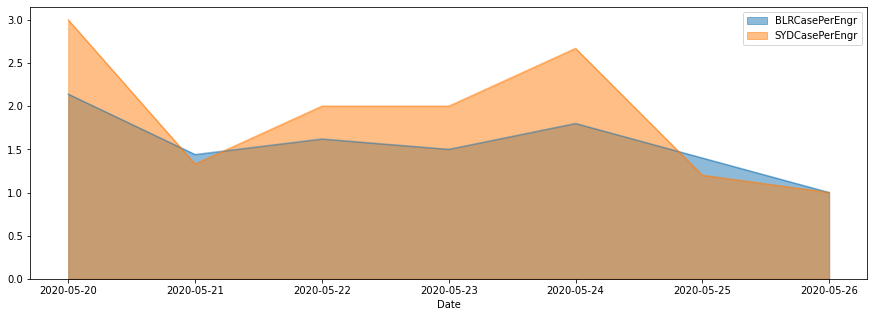

In [110]:
#######Case Per Engineer Plot combined area plot######
df_caseperengr_compare.plot(kind='area',x='Date',y=['BLRCasePerEngr','SYDCasePerEngr'],figsize=[15,5],stacked=False)

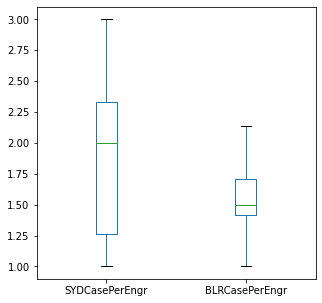

In [111]:
#######Case Per Engineer Plot combined box plot######
df_caseperengr_compare.plot(kind='box',x='Date',y=['SYDCasePerEngr','BLRCasePerEngr'],figsize=[5,5])